# PARCIAL ML

## Ejercicio 4: EDA


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

### Datos: Velocidad del viento

In [9]:
# lectura de datos
viento_df = pd.read_csv('C:/Users/kaes1/Downloads/data_treino_dv_df_2000_2010.csv')
viento_df.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [10]:
# Nombres de columnas
viento_df.columns

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')

Por dificultad de compresión de los nombres, se realizará el cambio de nombres para los campos del dataset

* **Renombrar variables**

In [11]:
# Renombrar variables
nuevos_nombres = {'HORA (UTC)': 'HORA (UTC)', 
                  'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'DirVientoHoraria',
                  'VENTO, VELOCIDADE HORARIA (m/s)': 'VelHorariaViento',
                  'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'HumRelMaxHAnt',
                  'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'HumRelMinHAnt',
                  'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'TempMaxHAnt',
                  'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'TempMinHAnt',
                  'UMIDADE RELATIVA DO AR, HORARIA (%)': 'HumRelHoraria',
                  'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'PresionAtmNivEstHor',
                  'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'PreciTotalHr',
                  'VENTO, RAJADA MAXIMA (m/s)': 'MaxRafagaViento',
                  'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'PreAtmMaxHAnt',
                  'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'PreAtmMinHAnt'}
viento_df.rename(columns=nuevos_nombres, inplace=True)
viento_df.columns


Index(['HORA (UTC)', 'DirVientoHoraria', 'VelHorariaViento', 'HumRelMaxHAnt',
       'HumRelMinHAnt', 'TempMaxHAnt', 'TempMinHAnt', 'HumRelHoraria',
       'PresionAtmNivEstHor', 'PreciTotalHr', 'MaxRafagaViento',
       'PreAtmMaxHAnt', 'PreAtmMinHAnt'],
      dtype='object')

In [12]:
# Tipos de variables
viento_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HORA (UTC)           87693 non-null  object 
 1   DirVientoHoraria     87693 non-null  float64
 2   VelHorariaViento     87693 non-null  float64
 3   HumRelMaxHAnt        87693 non-null  float64
 4   HumRelMinHAnt        87693 non-null  float64
 5   TempMaxHAnt          87693 non-null  float64
 6   TempMinHAnt          87693 non-null  float64
 7   HumRelHoraria        87693 non-null  float64
 8   PresionAtmNivEstHor  87693 non-null  float64
 9   PreciTotalHr         87693 non-null  float64
 10  MaxRafagaViento      87693 non-null  float64
 11  PreAtmMaxHAnt        87693 non-null  float64
 12  PreAtmMinHAnt        87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


In [13]:
# Tipos de variables
cat_cols=viento_df.select_dtypes(include=['object']).columns
num_cols = viento_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['HORA (UTC)'], dtype='object')
Numerical Variables:
['DirVientoHoraria', 'VelHorariaViento', 'HumRelMaxHAnt', 'HumRelMinHAnt', 'TempMaxHAnt', 'TempMinHAnt', 'HumRelHoraria', 'PresionAtmNivEstHor', 'PreciTotalHr', 'MaxRafagaViento', 'PreAtmMaxHAnt', 'PreAtmMinHAnt']


Todos los los campos del dataset son númericos, a excepción del campo "HORA (UTC)" que es de tipo objeto

* **Decripción númerica de los datos**

In [14]:
# Descripción númerica de los datos
viento_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DirVientoHoraria,87693.0,0.405810,0.686247,-1.0,-0.156434,0.788011,0.970296,1.0
VelHorariaViento,87693.0,2.466192,1.313968,0.0,1.500000,2.400000,3.400000,10.0
HumRelMaxHAnt,87693.0,69.058465,19.640222,12.0,54.000000,72.000000,87.000000,100.0
HumRelMinHAnt,87693.0,63.176194,20.166336,10.0,48.000000,64.000000,80.000000,98.0
TempMaxHAnt,87693.0,21.921264,3.721386,9.2,19.200000,21.400000,24.700000,35.3
TempMinHAnt,87693.0,20.684570,3.513744,8.4,18.400000,20.200000,23.100000,34.4
HumRelHoraria,87693.0,66.146682,19.992327,10.0,51.000000,68.000000,84.000000,99.0
PresionAtmNivEstHor,87693.0,887.251925,4.012404,863.4,885.300000,887.200000,889.100000,1023.5
PreciTotalHr,87693.0,0.160907,1.307515,0.0,0.000000,0.000000,0.000000,70.8
MaxRafagaViento,87693.0,5.161076,2.311157,0.0,3.400000,5.000000,6.800000,24.3


Se puede observar que ciertas variables manejan una escala de medida mucho mayor en comparación a las demás, por lo que podria ser necesario escalar o transformar los datos para tareas de analiticas posteriores. Ejemplo de esto son las varibles **PresionAtmNivEstHor**, **PreAtmMaxHAnt** y **PreAtmMinHAnt**

* **Conteo de datos faltantes y procentaje**

In [15]:
# Conteo de datos faltantes
viento_df.isnull().sum()

HORA (UTC)             0
DirVientoHoraria       0
VelHorariaViento       0
HumRelMaxHAnt          0
HumRelMinHAnt          0
TempMaxHAnt            0
TempMinHAnt            0
HumRelHoraria          0
PresionAtmNivEstHor    0
PreciTotalHr           0
MaxRafagaViento        0
PreAtmMaxHAnt          0
PreAtmMinHAnt          0
dtype: int64

In [16]:
# Porcentaje de datos faltantes
(viento_df.isnull().sum()/(len(viento_df)))*100

HORA (UTC)             0.0
DirVientoHoraria       0.0
VelHorariaViento       0.0
HumRelMaxHAnt          0.0
HumRelMinHAnt          0.0
TempMaxHAnt            0.0
TempMinHAnt            0.0
HumRelHoraria          0.0
PresionAtmNivEstHor    0.0
PreciTotalHr           0.0
MaxRafagaViento        0.0
PreAtmMaxHAnt          0.0
PreAtmMinHAnt          0.0
dtype: float64

El dataset de Velocidad del viento no tienen ningún valor faltante, por lo que no será necesario realizar tareas de imputación.

* **Análisis Univariado**

A continuación se hará el análisis de simetría, datos atípicos y dispersión para las variables númericas

In [17]:
from scipy.stats import kurtosis

Column:  VelHorariaViento
Skew: 0.37
Kurtosis:  -0.11


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


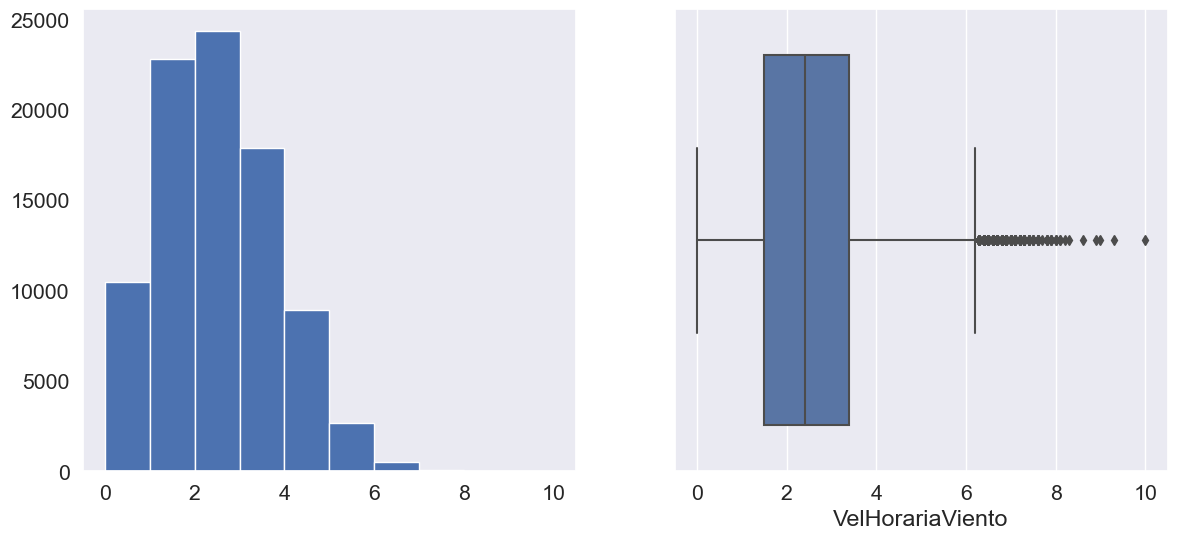

In [18]:
# Variable dependiente
sns.set(font_scale=1.4)
col = 'VelHorariaViento'
print('Column: ', col)
print('Skew:', round(viento_df[col].skew(), 2))
print('Kurtosis: ', round(viento_df[col].kurtosis(), 2))
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
viento_df[col].hist(grid=False)
plt.subplot(1, 2, 2)
sns.boxplot(x=viento_df[col])
plt.show()

Nuestra variable de interes, Velocidad horaria del viento (m/s), cuenta con datos sesgados ligeramente hacia la izquierda, indicando una concentración en valores por debajo de los 4 m/s. Se puede observar en el boxplot, que se tienen algunas velocidad que superan los 6 m/s, y que al aprecer estos valores se podrian considerar atipicos. Se debe detallar mas en el momentos y las condiciones de medición de esos registros para verificar si realmente son atipicos. 

In [19]:
# remover variable dependiente de la lista
num_cols.remove('VelHorariaViento')

Column:  DirVientoHoraria
Skew: -0.86
Kurtosis:  -0.82


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


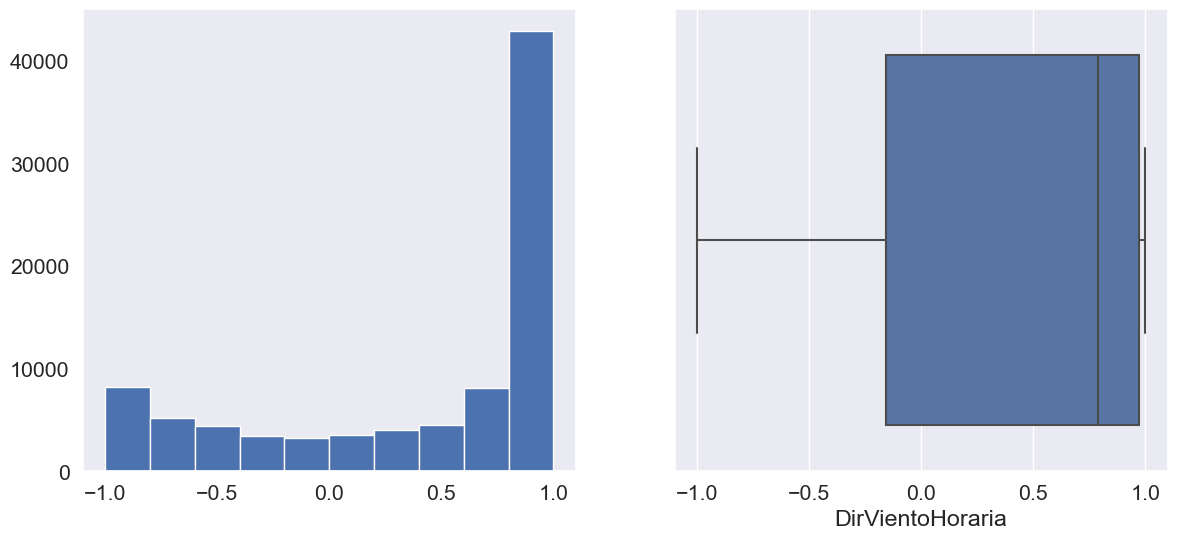

Column:  HumRelMaxHAnt
Skew: -0.48
Kurtosis:  -0.78


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


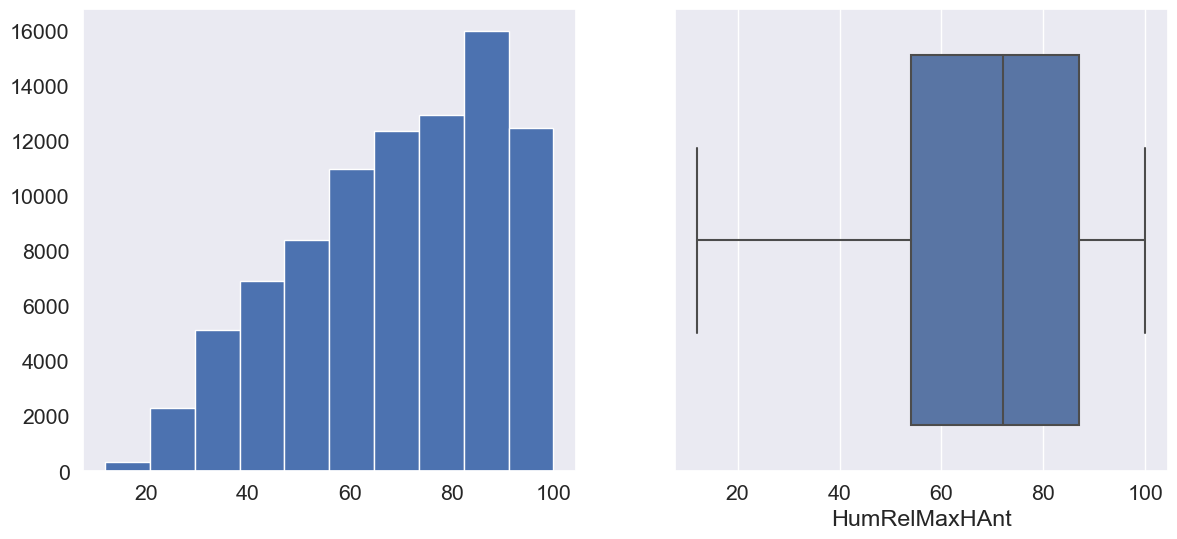

Column:  HumRelMinHAnt
Skew: -0.23
Kurtosis:  -0.96


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


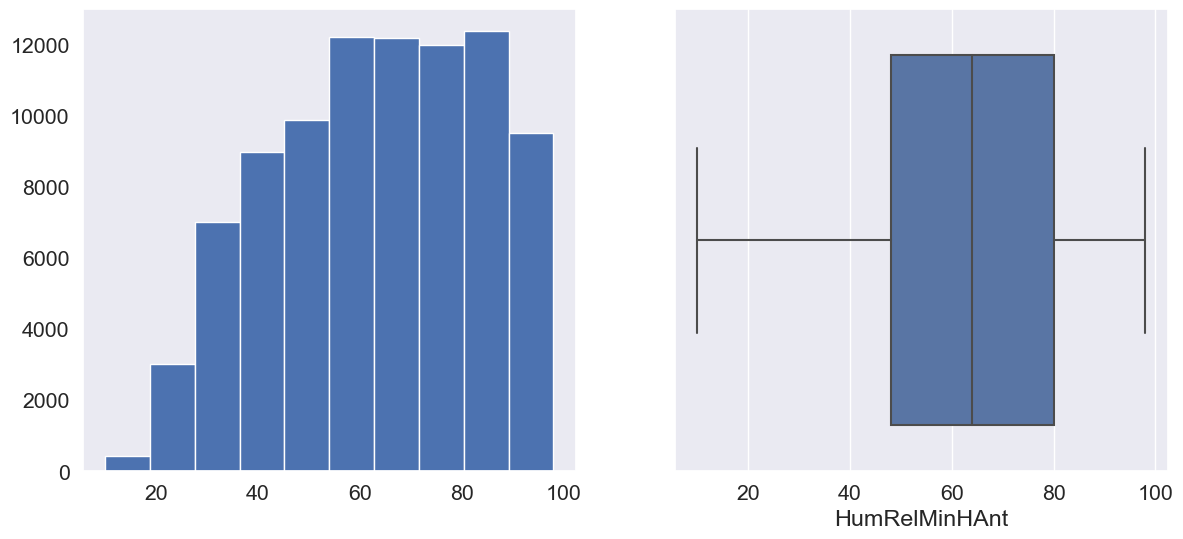

Column:  TempMaxHAnt
Skew: 0.26
Kurtosis:  -0.42


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


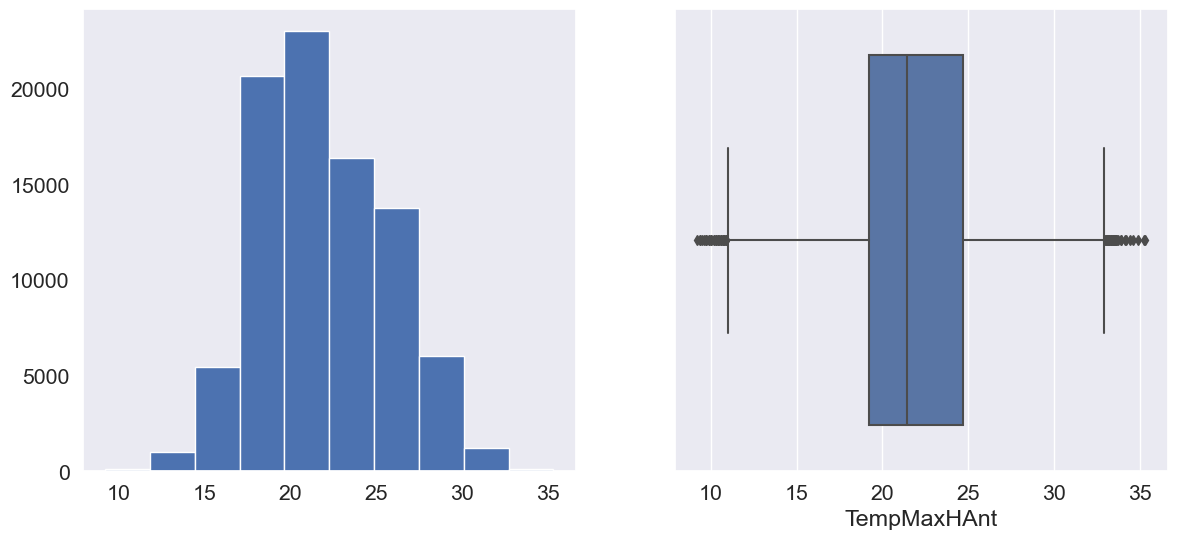

Column:  TempMinHAnt
Skew: 0.24
Kurtosis:  -0.12


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


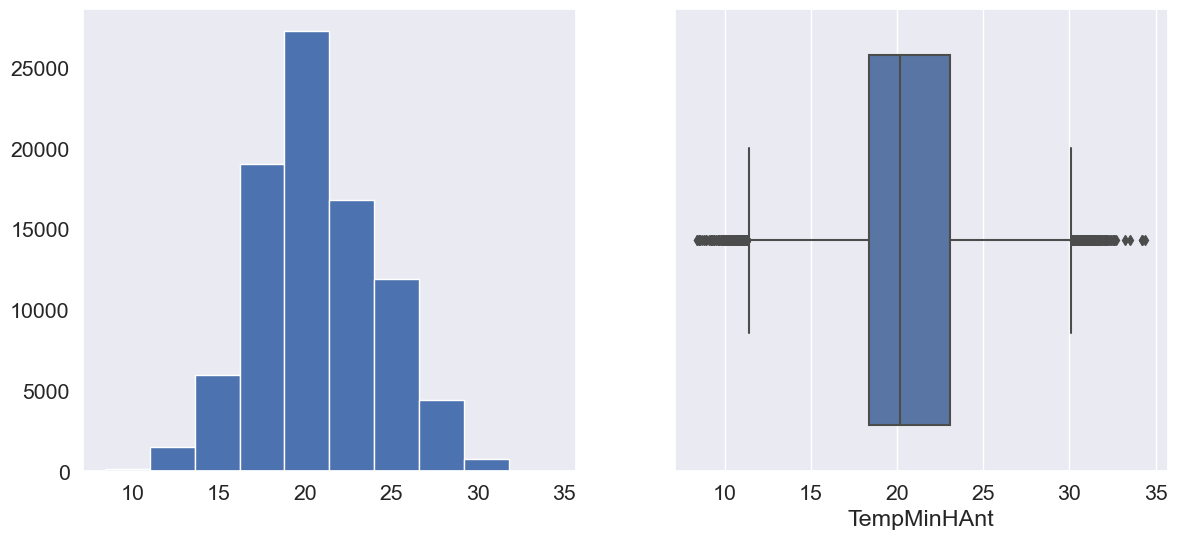

Column:  HumRelHoraria
Skew: -0.35
Kurtosis:  -0.89


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


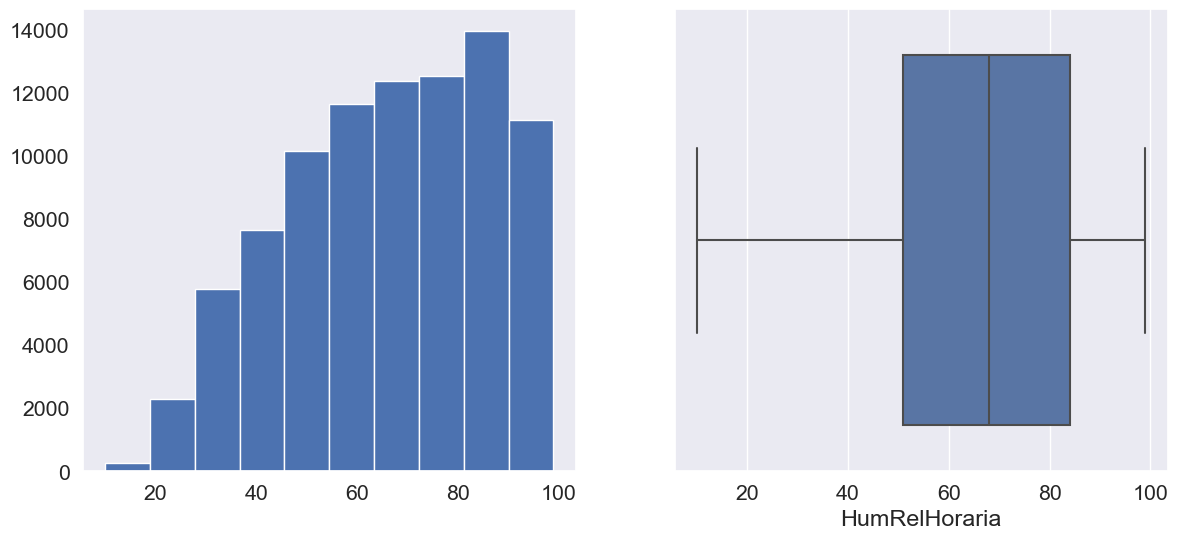

Column:  PresionAtmNivEstHor
Skew: 6.18
Kurtosis:  179.64


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


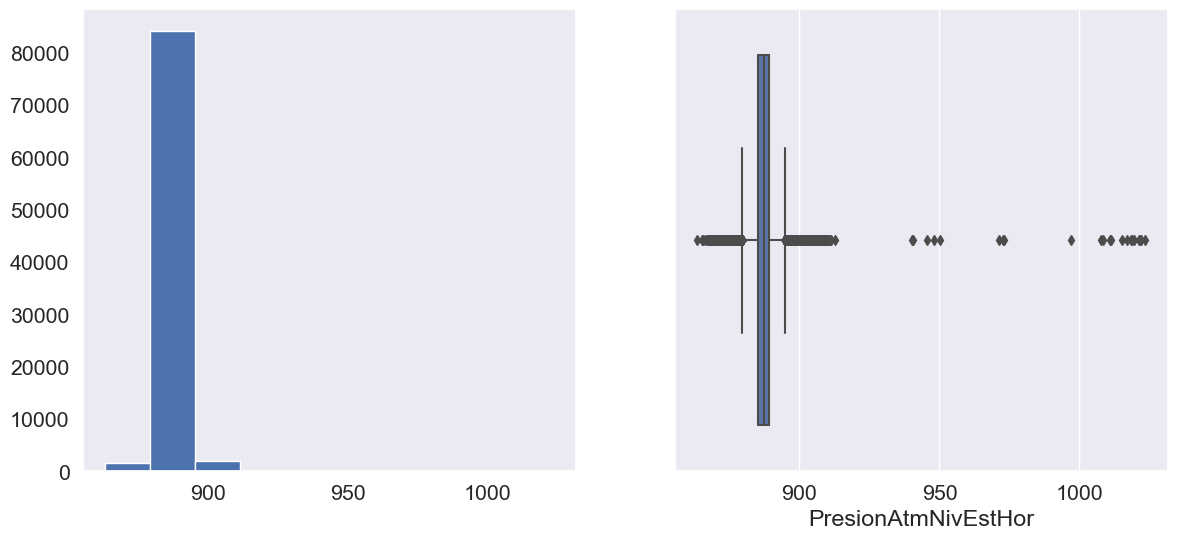

Column:  PreciTotalHr
Skew: 17.65
Kurtosis:  476.4


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


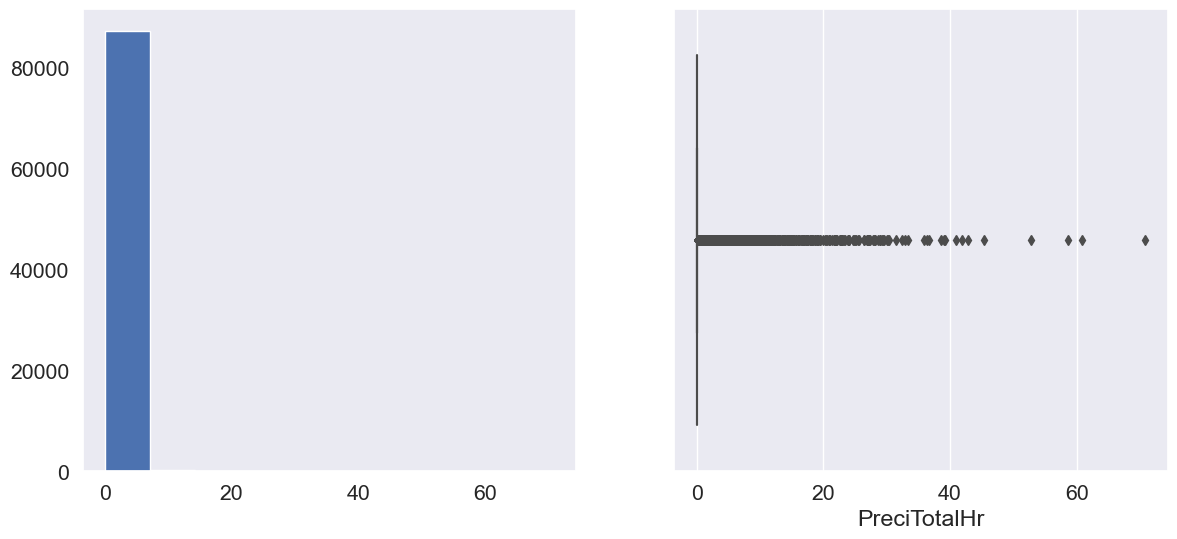

Column:  MaxRafagaViento
Skew: 0.41
Kurtosis:  0.11


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


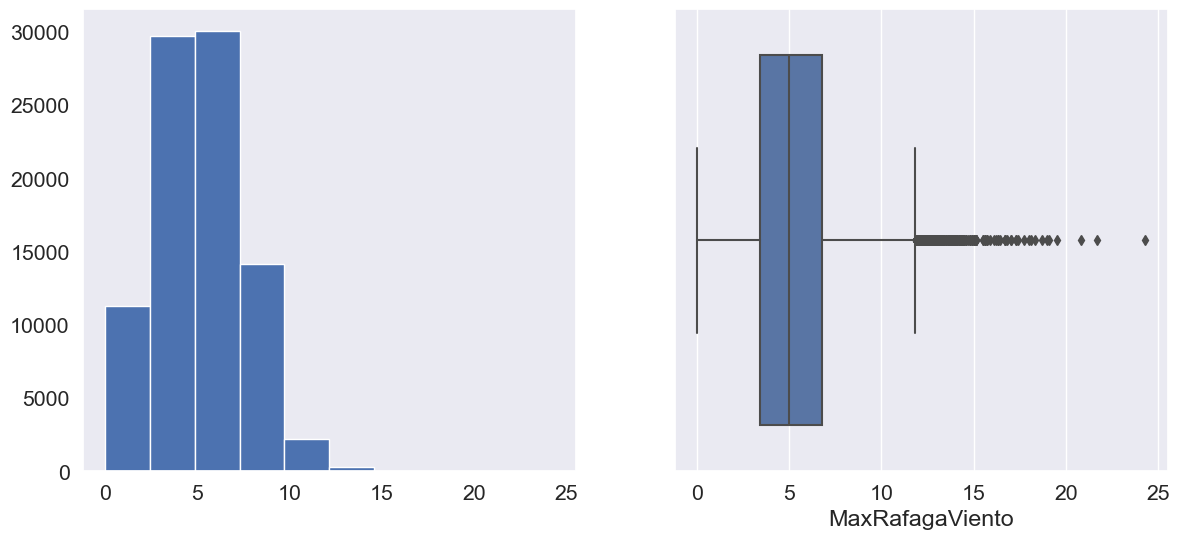

Column:  PreAtmMaxHAnt
Skew: 1.02
Kurtosis:  5.82


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


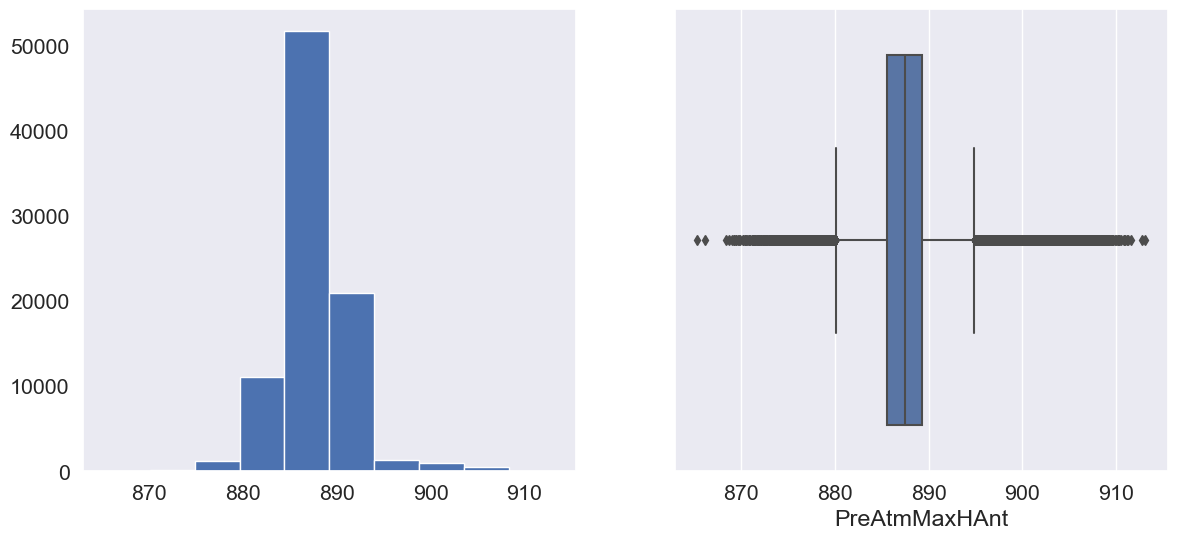

Column:  PreAtmMinHAnt
Skew: 0.33
Kurtosis:  4.91


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


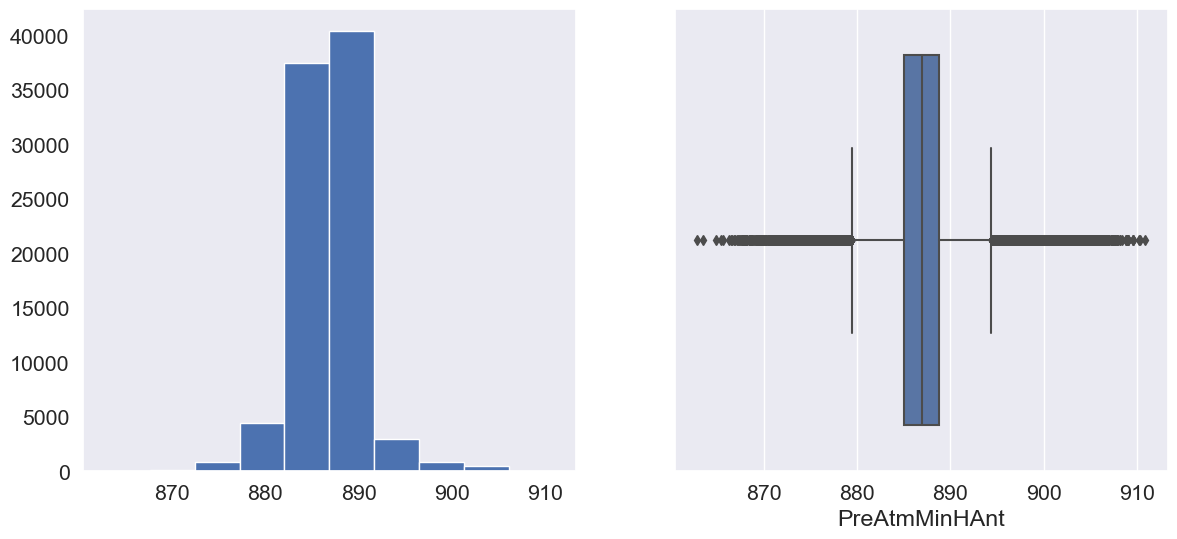

In [20]:
sns.set(font_scale=1.4)
for col in num_cols:
    print('Column: ', col)
    print('Skew:', round(viento_df[col].skew(), 2))
    print('Kurtosis: ', round(viento_df[col].kurtosis(), 2))
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    viento_df[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=viento_df[col])
    plt.show()

Se destacan del análisis las siguientes variables:
* **DirVientoHoraria**: Las medidades de dirección del veinto se encuentran sesgadas hacia la derecha, es decir, hacia valores cercanos a 1. No se tienen valores atipicos para esta medida. 
* **HumRelMaxHAnt**: Para el porcentaje de humedad relativa maxima de la hora anterior, se tiene un segso hacia la derecha, por lo que se concentra hacia porcentajes altos de humedad, y no se tienen atipicos para esta medida.
* **HumRelMinHAnt**: Similar a la variable HumRelMaxHAnt, se concentra en procentajes altos de humedad, y no se tienen valores atipicos.
* **TempMaxHAnt**:
* **TempMinHAn**:
* **HumRelHoraria**
* **PresionAtmNivEstHor**:
* **PreciTotalHr**:
* **MaxRafagaViento**:
* **PreAtmMaxHAnt**:
* **PreAtmMinHAnt**: Los registros de presión atmosferica minima se encuentran ligeramente sesgados a la izquierda, y hay presencia de valores atipicos, con alta dispersión de los datos




Ahora se observa la unica variable no númerica del dataset 'HORA (UTC)'. Se transforma la varaible en tipo datetime para mejorar su visualización.

c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


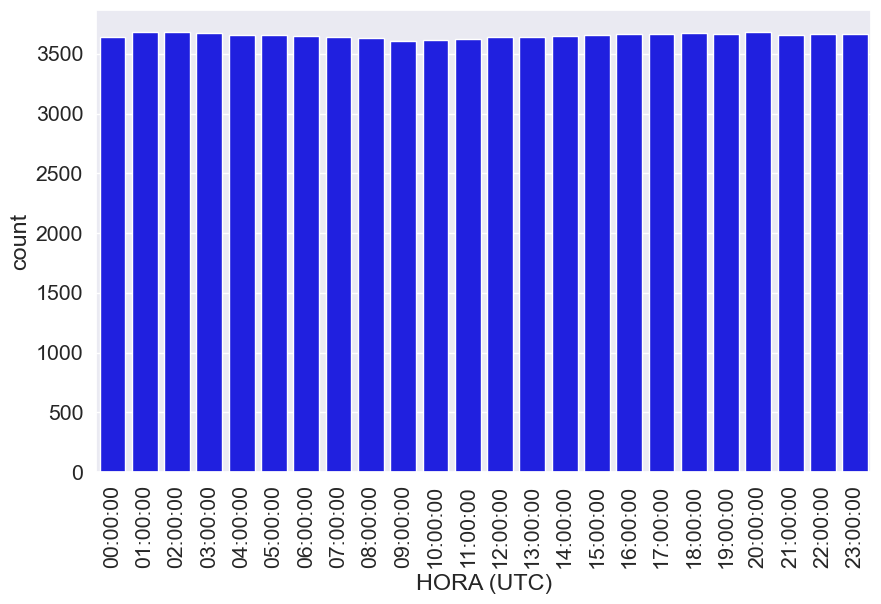

In [21]:
# Variable "categorica"
# sns.countplot(x = 'HORA (UTC)', data = viento_df, color = 'blue', order = viento_df['HORA (UTC)'].value_counts().index);
# plt.xticks(rotation=90)
viento_df['HORA (UTC)'] = pd.to_datetime(viento_df['HORA (UTC)'] , format='%H:%M').dt.time

# Ordena el DataFrame por la columna 'Hora'
viento_df = viento_df.sort_values(by='HORA (UTC)')

plt.figure(figsize=(10, 6))
sns.countplot(x='HORA (UTC)', data=viento_df, color='blue')
plt.xticks(rotation=90)
plt.show()

Se puede observar que para este caso se tiene una cantidad balanceada de datos para cada hora, lo que se asemeja a una distribución uniforme (aunque la variable no es númerica). 

* **Análisis Bivariado**

In [23]:
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1]);
    fig.suptitle('Relación entre %s y VelHorariaViento'%col)

c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

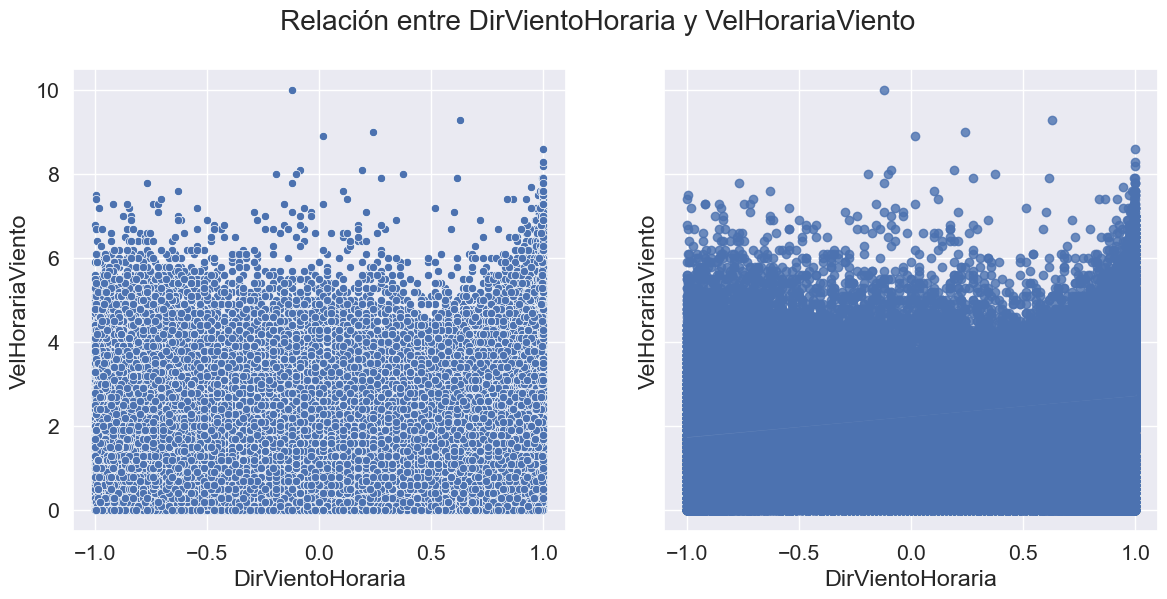

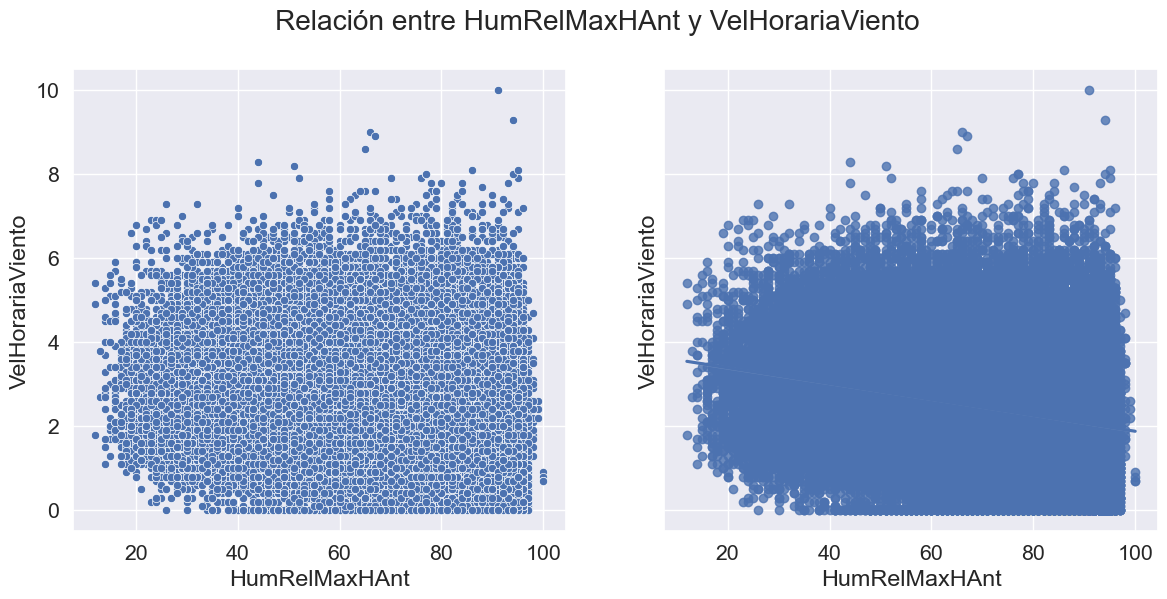

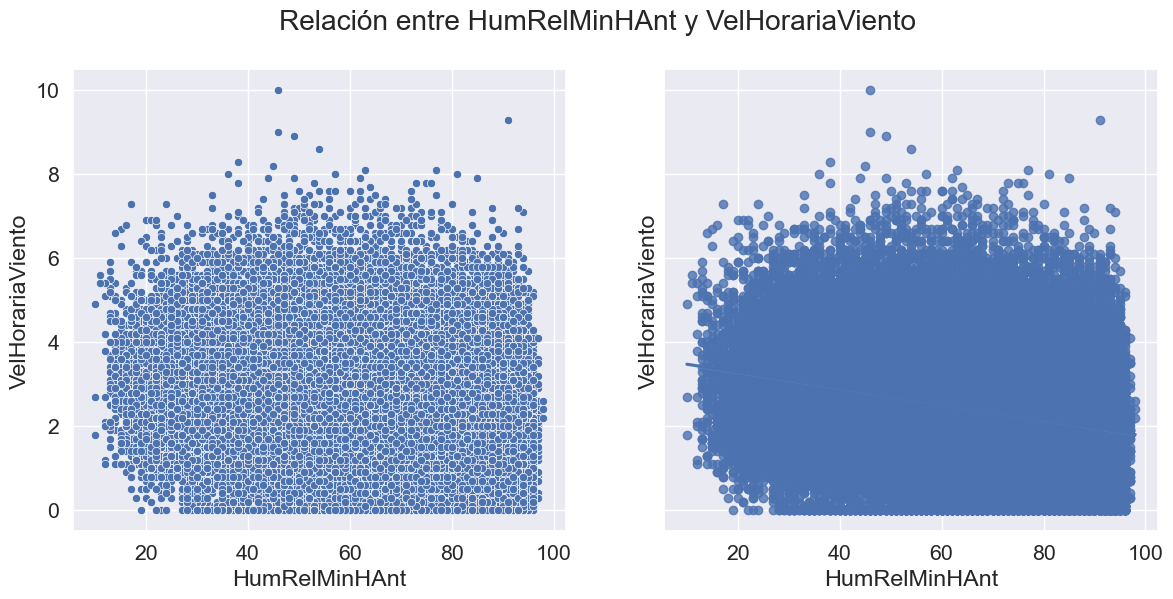

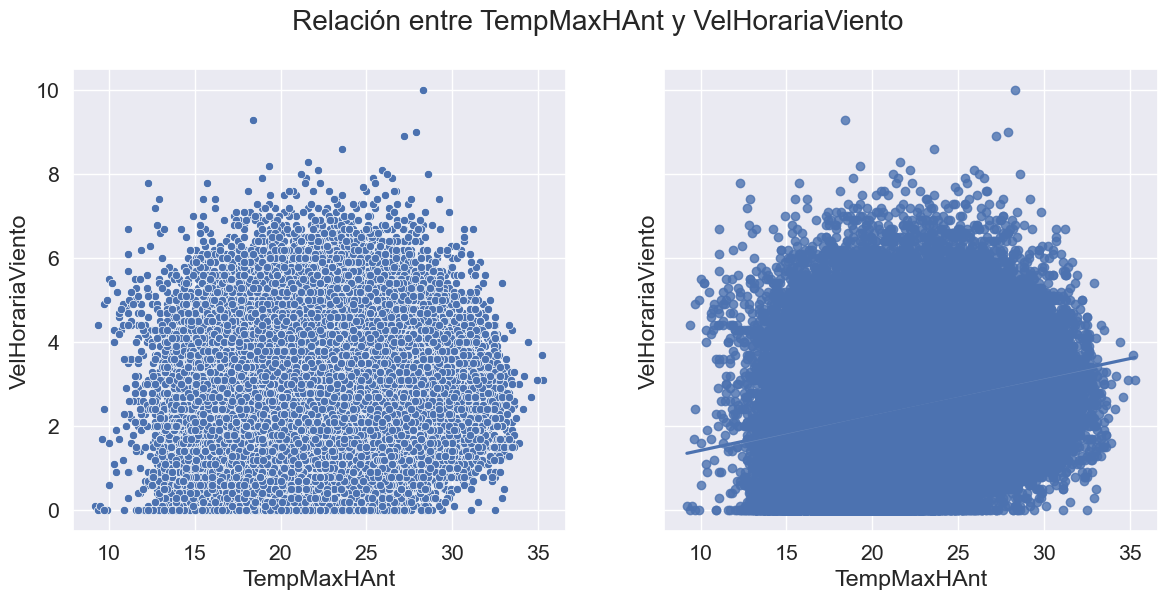

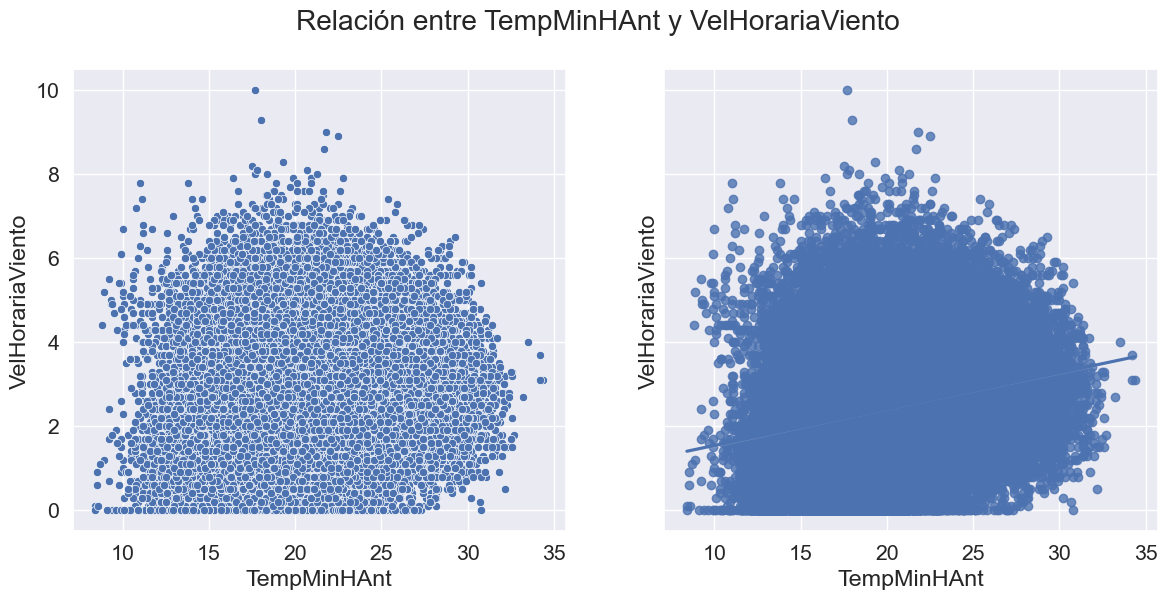

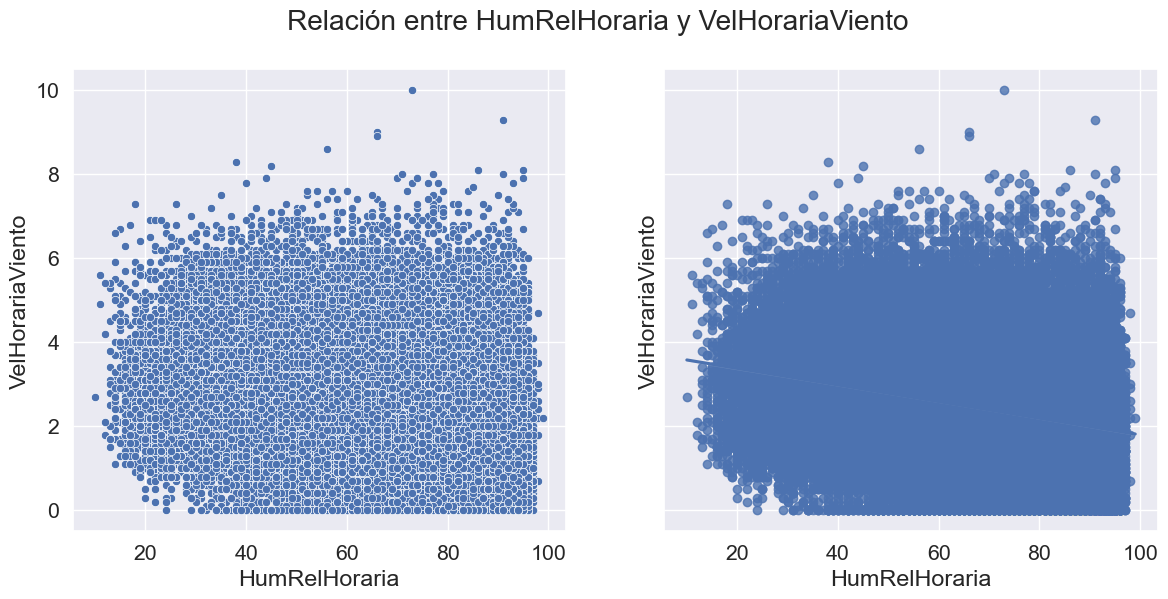

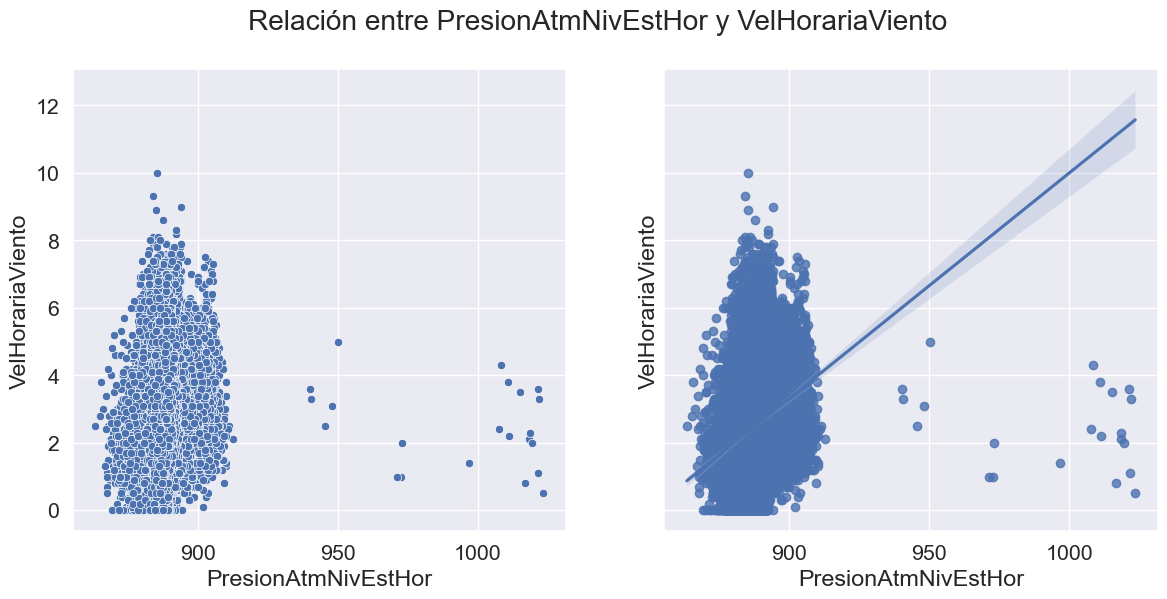

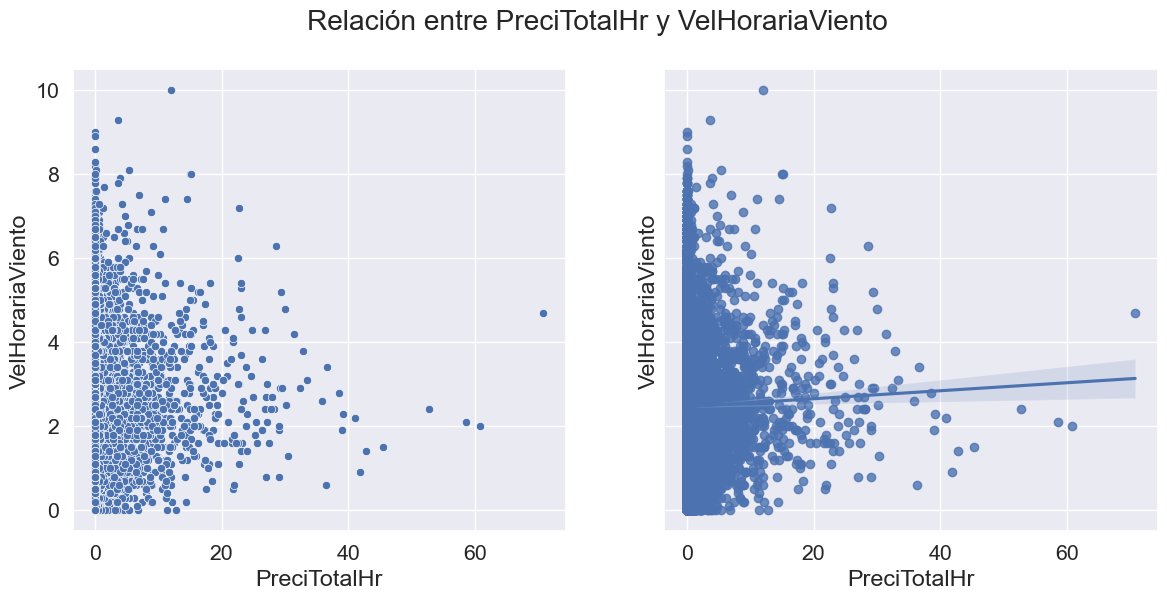

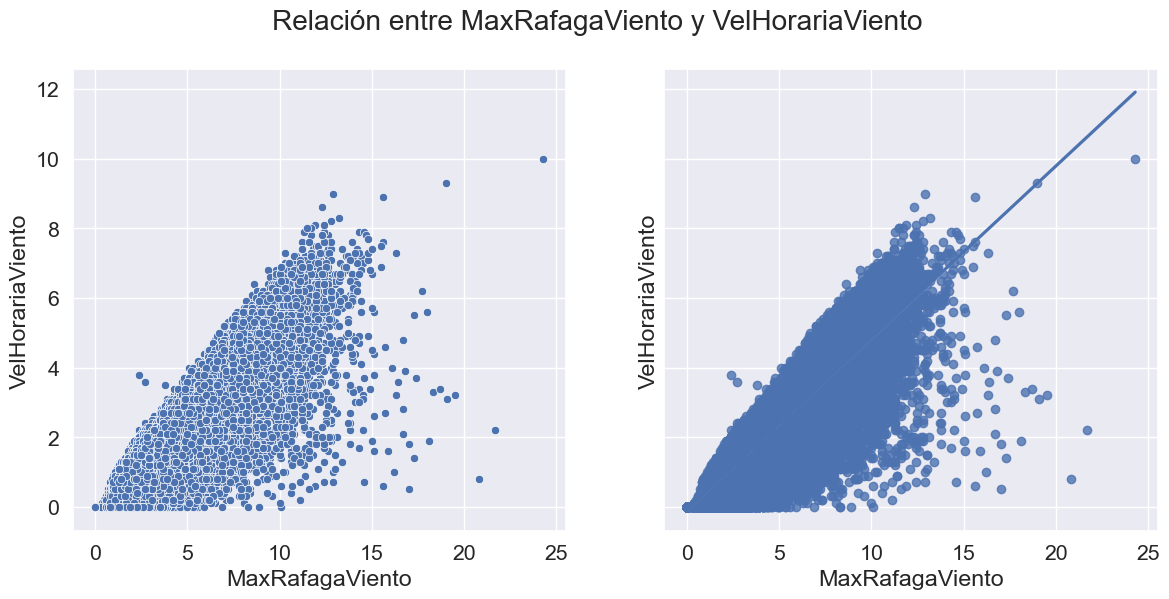

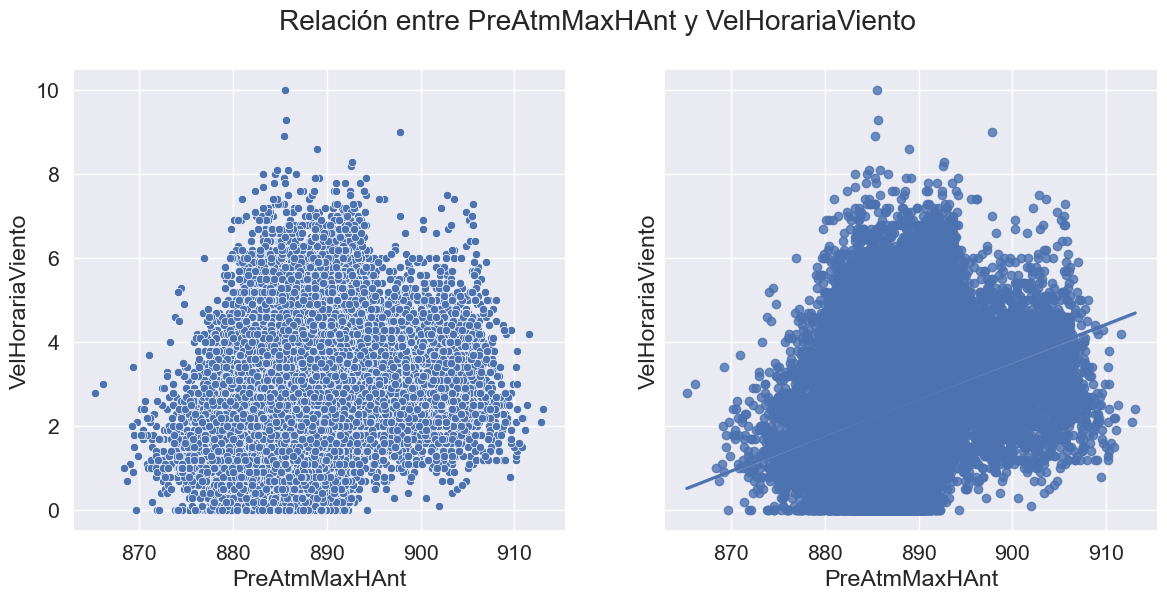

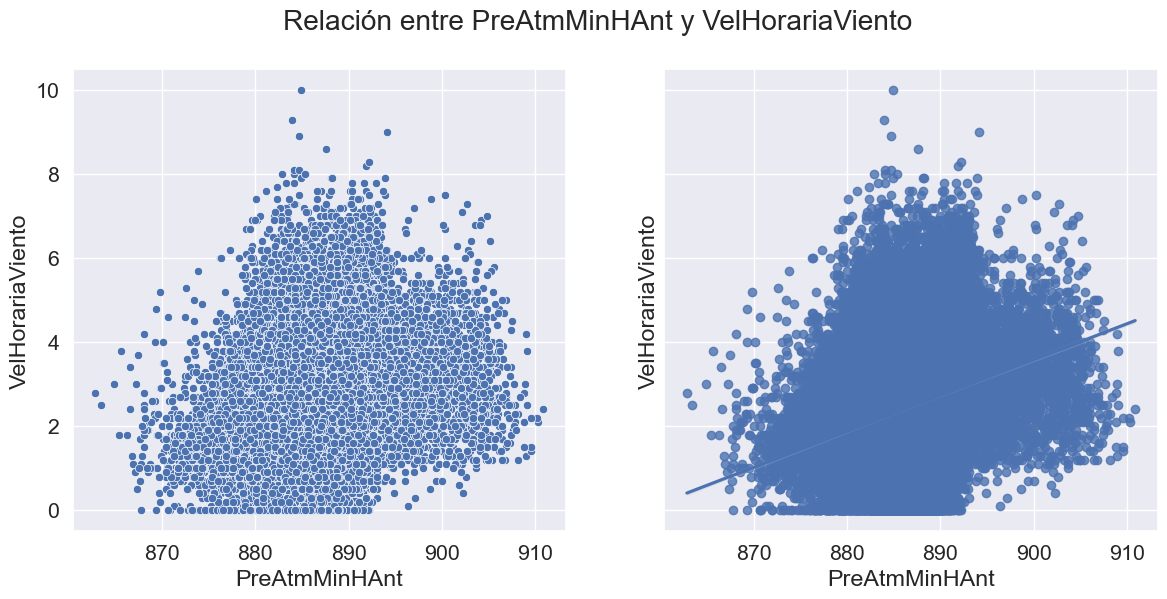

In [24]:
for col in num_cols:
    scatter_regplot(viento_df, col, 'VelHorariaViento')

Se puede observar rapidamente, que existe un gran dispersión en los datos al analizar la relación entre las variables explicativas y la variable dependiente. Para la mayoria de variables, como DirVientoHoraria, HumRelHoraria, TempMaxHAnt, entre otras, no se observa un patrón relación lineal frente a la variable respuesta o algún otro patrón. Para el caso de la varaible MaxRafagaViento, si se observa una relación lineal con respecto a la variable respuesta. Por otro lado, al observar el grafico entre la velocidad del viento y la Presion Atmosfericaa nivel de estación, se puede ver una aparente relación lineal entre las varaibles, pero la presencia de valores atipicos hacen que la linea de tendencia se trace de manera equivocada. 

* Análisis de Multicolinealidad


In [28]:
matplotlib.rc_file_defaults()

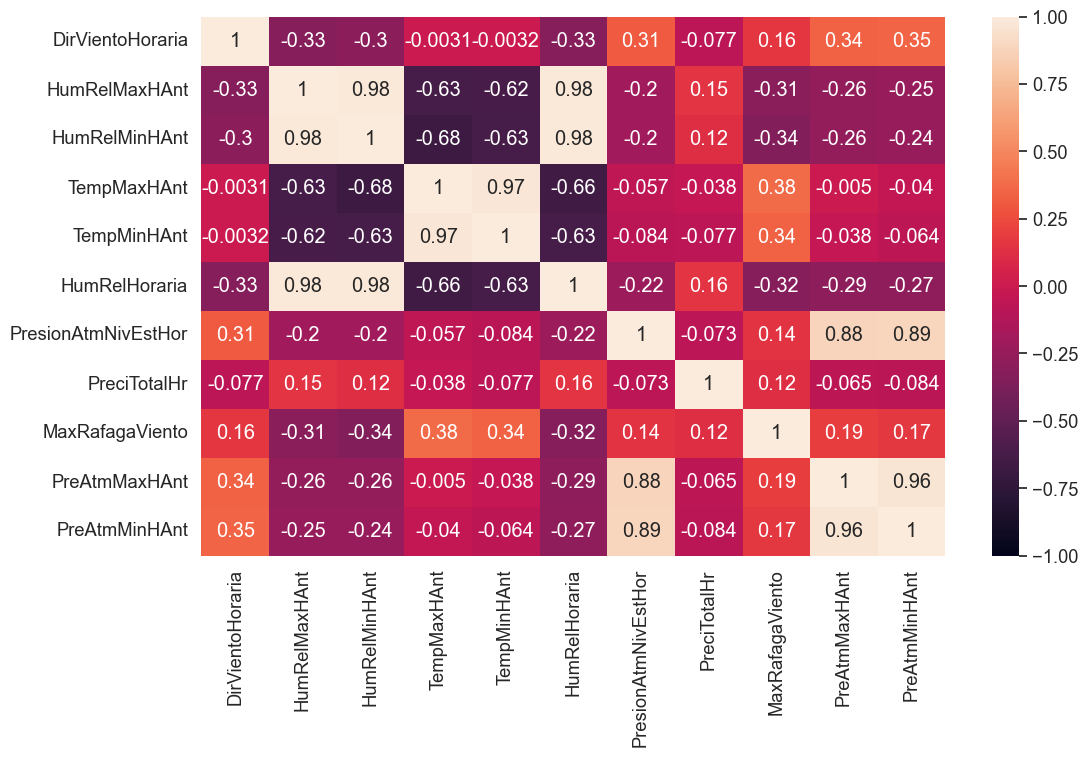

In [29]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 7))
sns.heatmap(viento_df.drop(['HORA (UTC)',  'VelHorariaViento'],axis=1).corr(), annot = True, vmin = -1, vmax = 1);

Se puede observar en el grafico de correlación, que existe una correlación fuerte entre varias variables, como por ejemplo entre los porcentajes de humedad, las medidas de temperatura o las medidas de presión atmosferica. Por lo que se podria considerar retirar del análisis algunas de estas variables para evitar problemas de multicolinealidad. 

Se calcula a cotinuación el VIF (Variance Inflation Factor) para reducir la dimensionalidad del dataset y evitar el problema de multicolinealidad.

* Iteración 1:

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(['HORA (UTC)',  'VelHorariaViento'],axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(['HORA (UTC)',  'VelHorariaViento'],axis=1).values, i) for i in range(viento_df.drop(['HORA (UTC)',  'VelHorariaViento'],axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.714903
1,HumRelMaxHAnt,1035.490461
2,HumRelMinHAnt,868.669868
3,TempMaxHAnt,2431.219027
4,TempMinHAnt,2035.022178
5,HumRelHoraria,593.271593
6,PresionAtmNivEstHor,239633.065205
7,PreciTotalHr,1.137503
8,MaxRafagaViento,7.476801
9,PreAtmMaxHAnt,944178.864436


Hay variables variables con un VIF alto de momento se retira del análisis la variable **PresionAtmNivEstHor** la cual tiene el VIF mas alto

* Iteración 2:

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(['HORA (UTC)',  'VelHorariaViento', 'PresionAtmNivEstHor'],axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(['HORA (UTC)',  'VelHorariaViento', 'PresionAtmNivEstHor'],axis=1).values, i) for i in range(viento_df.drop(['HORA (UTC)',  'VelHorariaViento','PresionAtmNivEstHor'],axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.714392
1,HumRelMaxHAnt,1035.431082
2,HumRelMinHAnt,868.644543
3,TempMaxHAnt,2430.951665
4,TempMinHAnt,2034.320457
5,HumRelHoraria,593.239442
6,PreciTotalHr,1.137080
7,MaxRafagaViento,7.475936
8,PreAtmMaxHAnt,895179.274051
9,PreAtmMinHAnt,893328.383585


En esta iteración todavia se tiene alta multicolinealidad entre los datos, por lo que se deben seguir retirando variables del análisis. En esta ocasión se retira del análisis la variable **PreAtmMaxHAnt**

* Iteración 3:

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(['HORA (UTC)',  'VelHorariaViento', 'PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(['HORA (UTC)',  'VelHorariaViento', 'PreAtmMaxHAnt','PresionAtmNivEstHor'],axis=1).values, i) for i in range(viento_df.drop(['HORA (UTC)',  'VelHorariaViento','PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.714366
1,HumRelMaxHAnt,1035.399240
2,HumRelMinHAnt,867.782115
3,TempMaxHAnt,2400.923250
4,TempMinHAnt,2013.072915
5,HumRelHoraria,592.852531
6,PreciTotalHr,1.135678
7,MaxRafagaViento,7.466863
8,PreAtmMinHAnt,163.683465


Se va retirar la variable **TempMaxHAnt** del análisis

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(['HORA (UTC)', 'TempMaxHAnt', 'VelHorariaViento', 'PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(['HORA (UTC)','TempMaxHAnt',  'VelHorariaViento', 'PreAtmMaxHAnt','PresionAtmNivEstHor'],axis=1).values, i) for i in range(viento_df.drop(['HORA (UTC)', 'TempMaxHAnt', 'VelHorariaViento','PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.698678
1,HumRelMaxHAnt,471.465591
2,HumRelMinHAnt,376.952353
3,TempMinHAnt,65.770269
4,HumRelHoraria,589.193597
5,PreciTotalHr,1.112755
6,MaxRafagaViento,7.412678
7,PreAtmMinHAnt,141.301897


Ahora se retira del análisis la varible 'HumRelMaxHAnt'

* Iteración 5:

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(['HORA (UTC)','HumRelMaxHAnt','TempMaxHAnt', 'VelHorariaViento', 'PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(['HORA (UTC)','TempMaxHAnt', 'HumRelMaxHAnt', 'VelHorariaViento', 'PreAtmMaxHAnt','PresionAtmNivEstHor'],axis=1).values, i) for i in range(viento_df.drop(['HORA (UTC)', 'TempMaxHAnt', 'HumRelMaxHAnt','VelHorariaViento','PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.687972
1,HumRelMinHAnt,344.138918
2,TempMinHAnt,65.699340
3,HumRelHoraria,387.413480
4,PreciTotalHr,1.112150
5,MaxRafagaViento,7.338279
6,PreAtmMinHAnt,137.713985


* Iteración 6

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(['HORA (UTC)', 'HumRelHoraria','HumRelMaxHAnt','TempMaxHAnt', 'VelHorariaViento', 'PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(['HORA (UTC)','HumRelHoraria','TempMaxHAnt', 'HumRelMaxHAnt', 'VelHorariaViento', 'PreAtmMaxHAnt','PresionAtmNivEstHor'],axis=1).values, i) for i in range(viento_df.drop(['HORA (UTC)', 'TempMaxHAnt', 'HumRelHoraria','HumRelMaxHAnt','VelHorariaViento','PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.634491
1,HumRelMinHAnt,21.279666
2,TempMinHAnt,65.319686
3,PreciTotalHr,1.068907
4,MaxRafagaViento,7.332568
5,PreAtmMinHAnt,132.173462


* Iteración 7

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(['HORA (UTC)', 'HumRelHoraria','PreAtmMinHAnt','HumRelMaxHAnt','TempMaxHAnt', 'VelHorariaViento', 'PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(['HORA (UTC)','HumRelHoraria','PreAtmMinHAnt','TempMaxHAnt', 'HumRelMaxHAnt', 'VelHorariaViento', 'PreAtmMaxHAnt','PresionAtmNivEstHor'],axis=1).values, i) for i in range(viento_df.drop(['HORA (UTC)', 'PreAtmMinHAnt','TempMaxHAnt', 'HumRelHoraria','HumRelMaxHAnt','VelHorariaViento','PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.408214
1,HumRelMinHAnt,5.851698
2,TempMinHAnt,12.640946
3,PreciTotalHr,1.068262
4,MaxRafagaViento,7.242287


* Iteración 8

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(['HORA (UTC)', 'TempMinHAnt','HumRelHoraria','PreAtmMinHAnt','HumRelMaxHAnt','TempMaxHAnt', 'VelHorariaViento', 'PresionAtmNivEstHor', 'PreAtmMaxHAnt'],axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(['HORA (UTC)','TempMinHAnt','HumRelHoraria','PreAtmMinHAnt','TempMaxHAnt', 'HumRelMaxHAnt', 'VelHorariaViento', 'PreAtmMaxHAnt','PresionAtmNivEstHor'],axis=1).values, i) for i in range(viento_df.drop(['HORA (UTC)', 'PreAtmMinHAnt','TempMaxHAnt', 'HumRelHoraria','HumRelMaxHAnt','VelHorariaViento','PresionAtmNivEstHor', 'PreAtmMaxHAnt', 'TempMinHAnt'],axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.389529
1,HumRelMinHAnt,3.184922
2,PreciTotalHr,1.039001
3,MaxRafagaViento,3.678934


Finalmente, en la iteración número 8, se obtienen solo 4 variables, las cuales nos permiten obtener un VIF menor a 5. 

## Datos: Fraude

In [43]:
# lectura de datos
fraudet_df = pd.read_csv('C:/Users/kaes1/Downloads/train_transaction.csv')
fraudet_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
fraudei_df = pd.read_csv('C:/Users/kaes1/Downloads/train_identity.csv')
fraudei_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [46]:
# merge de datos
fraude_df=pd.merge(fraudet_df, fraudei_df, on='TransactionID', how='left')
fraude_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [49]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [50]:
fraude_df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

In [51]:
# Tipos de variables
cat_cols=fraude_df.select_dtypes(include=['object']).columns
num_cols = fraude_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')
Numerical Variables:
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V4

La gran mayoria de variables explicativas son de tipo númerica

* Descripción de variables númericas

In [52]:
fraude_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04
...,...,...,...,...,...,...,...,...
id_22,5169.0,1.600271e+01,6.897665e+00,10.000,14.000,14.000,14.00,4.400000e+01
id_24,4747.0,1.280093e+01,2.372447e+00,11.000,11.000,11.000,15.00,2.600000e+01
id_25,5132.0,3.296089e+02,9.746109e+01,100.000,321.000,321.000,371.00,5.480000e+02
id_26,5163.0,1.490703e+02,3.210199e+01,100.000,119.000,149.000,169.00,2.160000e+02


* **Conteo y procentaje de datos faltantes**

In [55]:
# Conteo de datos faltantes
fraude_df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [56]:
# Porcentaje de datos faltantes
porcentaje_nulos = (fraude_df.isnull().sum()/(len(fraude_df)))*100
porcentaje_nulos

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             76.126088
id_37             76.126088
id_38             76.126088
DeviceType        76.155722
DeviceInfo        79.905510
Length: 434, dtype: float64

In [67]:
# Cantidad de columnas con datos perdidos
columnas_con_nulos = porcentaje_nulos[porcentaje_nulos >= 70]
columnas_nulas= columnas_con_nulos.index.tolist()
len(columnas_nulas)

208

Se puede ver que mas de 200 columnas con un porcentaje de datos nulos mayor o igual al 70%. Estas columnas no podrian ser usadas para tares de análisis avanzado o predictivas, ya que no brindan suficiente información.

Ahora se dejan en el dataset solo las columnas que tienen un porcentaje de datos perdido menor al 70%

In [68]:
# cantidad de columnas restantes
columnas_con_nulos = porcentaje_nulos[porcentaje_nulos < 70]
columnas_restantes= columnas_con_nulos.index.tolist()
len(columnas_restantes)

226

In [94]:
fraude_df.shape

(590540, 434)

In [96]:
# Eliminar columnas con nulos
fraude_df=fraude_df.drop(columnas_nulas, axis=1)
fraude_df.shape

(590540, 226)

* **Análisis Univariado**

In [89]:
labels = (fraude_df['isFraud'].value_counts())
labels

isFraud
0    569877
1     20663
Name: count, dtype: int64

c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


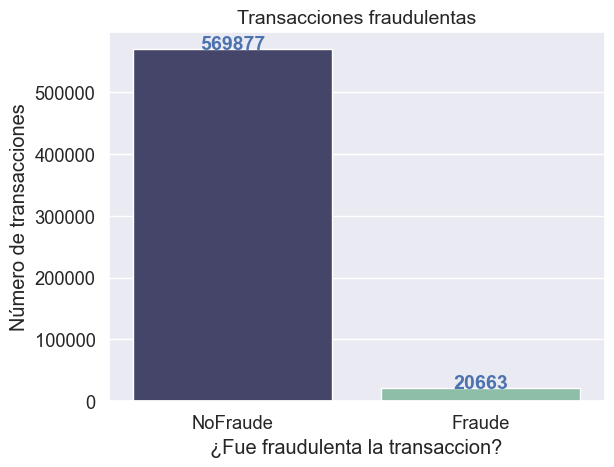

In [92]:
ax = sns.countplot(x = 'isFraud', data = fraude_df, palette=["#3f3e6fd1", "#85c6a9"])
plt.xticks(np.arange(2), ['NoFraude', 'Fraude'])
plt.title('Transacciones fraudulentas',fontsize= 14)
plt.xlabel('¿Fue fraudulenta la transaccion?')
plt.ylabel('Número de transacciones');

for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'b', fontweight = 'bold');

In [93]:
fraude_df['isFraud'].value_counts(normalize = True)

isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64

Se puede observar que la cantidad de transacciones fraudulentas en relativamente baja (solo un 3.5 %) en comparación a la cantidad de transacciones sin fraude (96.5%)

C:\Users\kaes1\AppData\Local\Temp\ipykernel_6836\2245847938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraude_df[(fraude_df["TransactionAmt"] > 0)].TransactionAmt, kde_kws={"lw": 3}, bins = 50)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. C

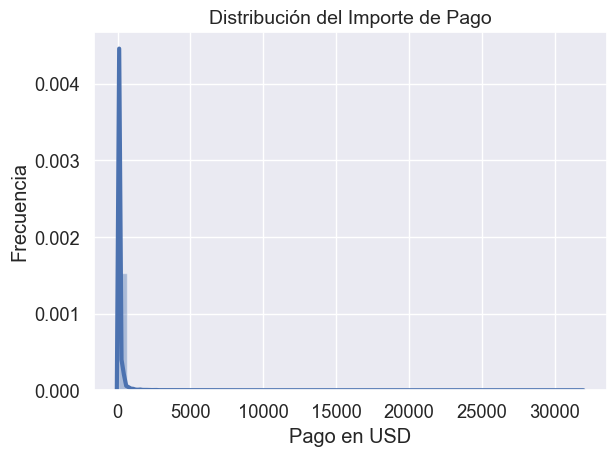

In [98]:
sns.distplot(fraude_df[(fraude_df["TransactionAmt"] > 0)].TransactionAmt, kde_kws={"lw": 3}, bins = 50)
plt.title('Distribución del Importe de Pago',fontsize= 14)
plt.xlabel('Pago en USD')
plt.ylabel('Frecuencia')
plt.tight_layout()

* **Análisis Bivariado**

In [87]:
melted_data = pd.melt(fraud_df, id_vars = "isFraud",value_vars = ['mean radius', 'mean texture', 
                                                              'mean perimeter'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="diagnosis",data= melted_data);

SyntaxError: invalid syntax (3187025494.py, line 1)